# Anomaly Detection

Implement an anomaly detection algorithm to detect anomalous behavior in server computers.

In [151]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import f1_score, classification_report
%matplotlib inline

## 1 Visualizing the data

In [152]:
data = loadmat('data/ex8data1.mat')
X = data['X']
X_label = data['Xval']
y_label = data['yval'].ravel()
print(X.shape)
print(X_label.shape)
print(y_label.shape)

(307, 2)
(307, 2)
(307,)


Text(0, 0.5, 'Throughout (mb/s)')

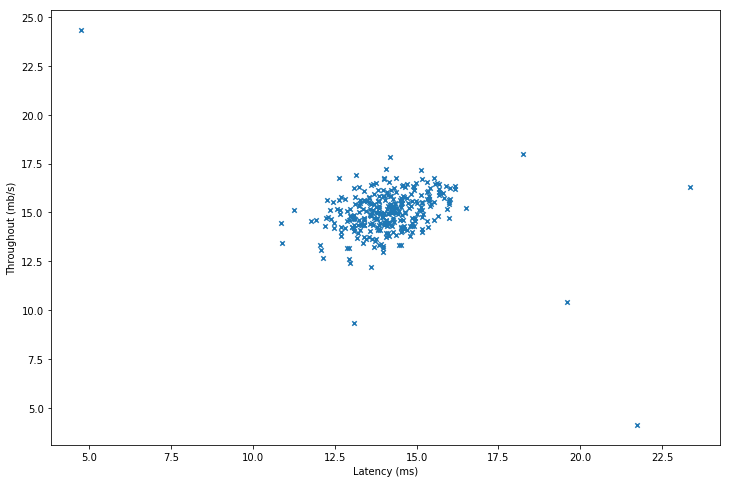

In [153]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X[:, 0], X[:, 1], s=20, marker='x')
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('Throughout (mb/s)')

In [154]:
def estimate_gaussian(X):
    return X.mean(axis=0), np.cov(X.T)

In [155]:
mu, cov = estimate_gaussian(X)
print(mu)
print(cov)

[14.11222578 14.99771051]
[[ 1.83862041 -0.22786456]
 [-0.22786456  1.71533273]]


In [156]:
dist = stats.multivariate_normal(mu, cov)

x, y = np.mgrid[0:30:0.01, 0:30:0.01]
pos = np.dstack((x, y))

Text(0, 0.5, 'Throughout (mb/s)')

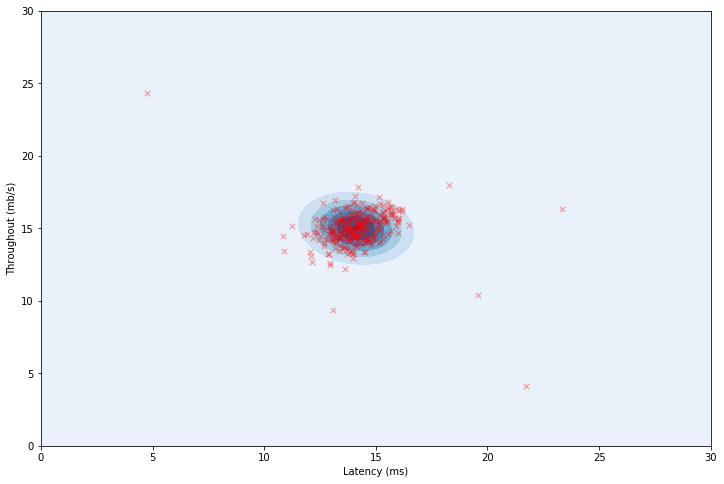

In [157]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.contourf(x, y, dist.pdf(pos), cmap='Blues')
ax.scatter(X[:, 0], X[:, 1], s=30, marker='x', c='r', alpha=0.3)
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('Throughout (mb/s)')

## 2 Selecting the threshold $\varepsilon$

In [158]:
def select_threshold(X, X_cv, y_cv, max_iters):
    mu, cov = estimate_gaussian(X)
    dist = stats.multivariate_normal(mu, cov)
    p = dist.pdf(X_cv)
    
    epslion = np.linspace(np.min(p), np.max(p), max_iters)
    fscore = []
    for e in epslion:
        y_pred = (p <= e).astype('int')
        fscore.append(f1_score(y_cv, y_pred))
    best = np.argmax(fscore)
    return epslion[best], fscore[best]

In [159]:
epsilon, f1 = select_threshold(X, X_label, y_label, max_iters=3000)
print('Best epsilon: {}\nBest F1-score: {}'.format(epsilon, f1))

Best epsilon: 3.0130845869144335e-05
Best F1-score: 0.8750000000000001


In [160]:
p = dist.pdf(X)
anomaly = X[p <= epsilon]
normal = X[p > epsilon]
print(anomaly.shape)
print(normal.shape)

(6, 2)
(301, 2)


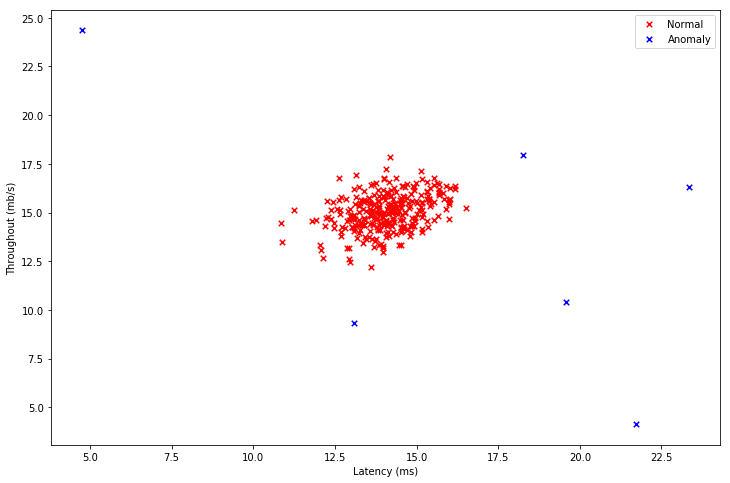

In [161]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(normal[:, 0], normal[:, 1], s=30, marker='x', c='r', label='Normal')
ax.scatter(anomaly[:, 0], anomaly[:, 1], s=30, marker='x', c='b', label='Anomaly')
ax.set_xlabel('Latency (ms)')
ax.set_ylabel('Throughout (mb/s)')
ax.legend()

In [162]:
y_pred = (p <= epsilon).astype('int')
print(classification_report(y_label, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       298
           1       1.00      0.67      0.80         9

   micro avg       0.99      0.99      0.99       307
   macro avg       1.00      0.83      0.90       307
weighted avg       0.99      0.99      0.99       307



## 3 High dimensional dataset

In [167]:
data = loadmat('data/ex8data2.mat')
X = data['X']
X_label = data['Xval']
y_label = data['yval'].ravel()
print(X.shape)
print(X_label.shape)
print(y_label.shape)

(1000, 11)
(100, 11)
(100,)


In [168]:
epsilon, f1 = select_threshold(X, X_label, y_label, max_iters=100000)
print('Best epsilon: {}\nBest F1-score: {}'.format(epsilon, f1))

Best epsilon: 1.7465171253385734e-19
Best F1-score: 0.7368421052631577


In [169]:
mu, cov = estimate_gaussian(X)
dist = stats.multivariate_normal(mu, cov)

In [170]:
p = dist.pdf(X_label)
anomaly = X_label[p <= epsilon]
normal = X_label[p > epsilon]
print(anomaly.shape)
print(normal.shape)

(9, 11)
(91, 11)


In [171]:
y_pred = (p <= epsilon).astype('int')
print(y_pred.shape)
print(y_label.shape)
print(classification_report(y_label, y_pred))

(100,)
(100,)
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        90
           1       0.78      0.70      0.74        10

   micro avg       0.95      0.95      0.95       100
   macro avg       0.87      0.84      0.85       100
weighted avg       0.95      0.95      0.95       100



In [172]:
p = dist.pdf(X)
anomaly = X[p <= epsilon]
anomaly.shape

(36, 11)